In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math

f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec.root")

def qq(key):
    #f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_hadron_xsec.root")
    qq = f[f"kkmc_ee_uu_ecm91p2/{key}"].to_hist()+ f[f"kkmc_ee_dd_ecm91p2/{key}"].to_hist()+f[f"kkmc_ee_cc_ecm91p2/{key}"].to_hist() +f[f"kkmc_ee_ss_ecm91p2/{key}"].to_hist() + f[f"kkmc_ee_bb_ecm91p2/{key}"].to_hist()
    return qq

In [2]:
def plot(number,samples,key,name,xlabel_name,ylabel_name = "Events",legend_loc = "best",stack_yn = True,fill_yn = "fill", lim = None, yscale_yn = True, save = False):
    
    histograms = []
    labels = []
    colors = []
    
    sample_dict = {"wzp_qq": "wzp6_ee_qq_ecm91p2", "mu": "wzp6_ee_mumu_ecm91p2", "tau": "wzp6_ee_tautau_ecm91p2", "e": "p8_ee_Zee_ecm91", "gaga":"wzp6_gaga_qq_5_ecm91p2","p8_mu": "p8_ee_Zmumu_ecm91", "p8_tau": "p8_ee_Ztautau_ecm91", "uu": "kkmc_ee_uu_ecm91p2", "dd": "kkmc_ee_dd_ecm91p2", "cc": "kkmc_ee_cc_ecm91p2", "ss": "kkmc_ee_ss_ecm91p2", "bb": "kkmc_ee_bb_ecm91p2"}
    label_dict = {"qq": r"$e^{+} e^{-} \rightarrow q \bar{q}$, KKMC", "wzp_qq": r"$e^{+} e^{-} \rightarrow q \bar{q}$, Whizard", "mu": r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$, Whizard", "tau": r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$, Whizard", "e": r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$, Pythia", "gaga":r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons, Whizard","p8_mu": r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$, Pythia", "p8_tau": r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$, Pythia", "uu": r"$e^{+} e^{-} \rightarrow u \bar{u}$, KKMC", "dd": r"$e^{+} e^{-} \rightarrow d \bar{d}$, KKMC", "cc": r"$e^{+} e^{-} \rightarrow c \bar{c}$, KKMC", "ss": r"$e^{+} e^{-} \rightarrow s \bar{s}$, KKMC", "bb": r"$e^{+} e^{-} \rightarrow b \bar{b}$, KKMC"}
    color_dict = {"qq": "paleturquoise", "wzp_qq": "darkviolet", "mu": "red", "tau": "limegreen", "e": "yellow", "gaga":"pink","p8_mu": "sandybrown", "p8_tau": "darkolivegreen", "uu": "moccasin", "dd": "chocolate", "cc": "magenta", "ss": "palegreen", "bb": "deepskyblue"}
                   
    for i in range (0,number):
        if samples[i] == "qq":
            histograms.append(qq(key))
        else:
            histograms.append(f[f"{sample_dict[samples[i]]}/{key}"].to_hist())
        labels.append(f"{label_dict[samples[i]]}")
        colors.append(f"{color_dict[samples[i]]}")
                   
    hep.histplot(histograms, label = labels, color = colors, stack = stack_yn, histtype = fill_yn)
                   
    if yscale_yn:
        plt.yscale("log")
    if lim != None:
        plt.xlim(lim[0],lim[1])
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
    plt.legend(loc = legend_loc)
    plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
    plt.title("FCC-ee simulation", loc = "left", weight = "bold")
                   
    if save:
        plt.savefig(f"images/{name}.png")

Text(0.0, 1.0, 'FCC-ee simulation')

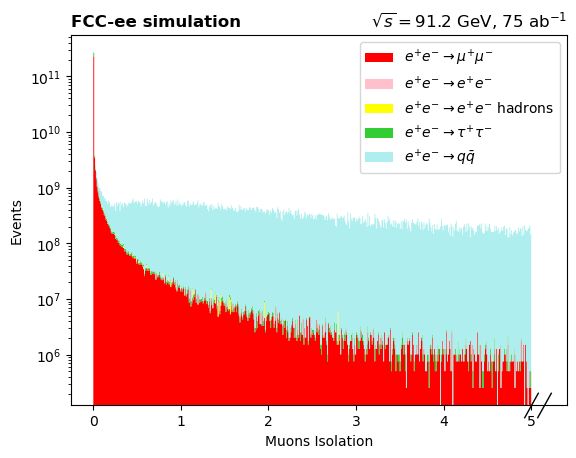

In [3]:
muons_iso = qq("muons_iso")
mu_muons_iso = f['wzp6_ee_mumu_ecm91p2/muons_iso;1'].to_hist()
e_muons_iso = f["p8_ee_Zee_ecm91/muons_iso"].to_hist()
tau_muons_iso = f['wzp6_ee_tautau_ecm91p2/muons_iso'].to_hist()
gaga_muons_iso = f['wzp6_gaga_qq_5_ecm91p2/muons_iso'].to_hist()

hep.histplot([mu_muons_iso,e_muons_iso, gaga_muons_iso, tau_muons_iso, muons_iso], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$",
                      r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons", r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill", color = ["red","pink","yellow", "limegreen", "paleturquoise"])

plt.yscale("log")
plt.xlabel("Muons Isolation")
plt.legend(loc = "upper right")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_all_muons_iso.png")

Text(0.0, 1.0, 'FCC-ee simulation')

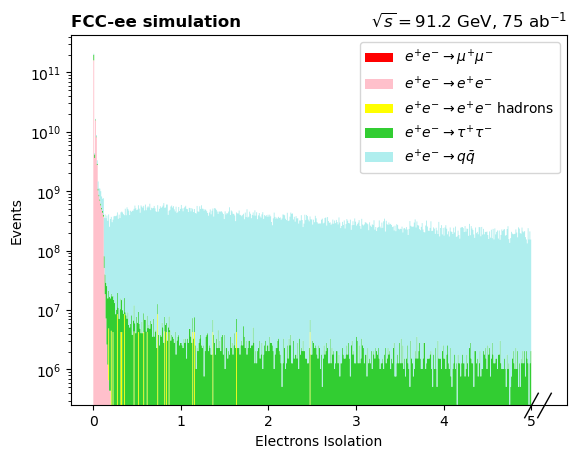

In [4]:
electrons_iso = qq("electrons_iso")
mu_electrons_iso = f['wzp6_ee_mumu_ecm91p2/electrons_iso;1'].to_hist()
e_electrons_iso = f["p8_ee_Zee_ecm91/electrons_iso"].to_hist()
tau_electrons_iso = f['wzp6_ee_tautau_ecm91p2/electrons_iso'].to_hist()
gaga_electrons_iso = f['wzp6_gaga_qq_5_ecm91p2/electrons_iso'].to_hist()

hep.histplot([mu_electrons_iso,e_electrons_iso, gaga_electrons_iso, tau_electrons_iso, electrons_iso], label = [r"$e^{+} e^{-} \rightarrow \mu^{+} \mu^{-}$",r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$",
                      r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons", r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$",
                                               r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
             stack = True, histtype = "fill", color = ["red","pink","yellow", "limegreen", "paleturquoise"])

plt.yscale("log")
plt.xlabel("Electrons Isolation")
plt.legend(loc = "upper right")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_all_electrons_iso.png")

Text(0.0, 1.0, 'FCC-ee simulation')

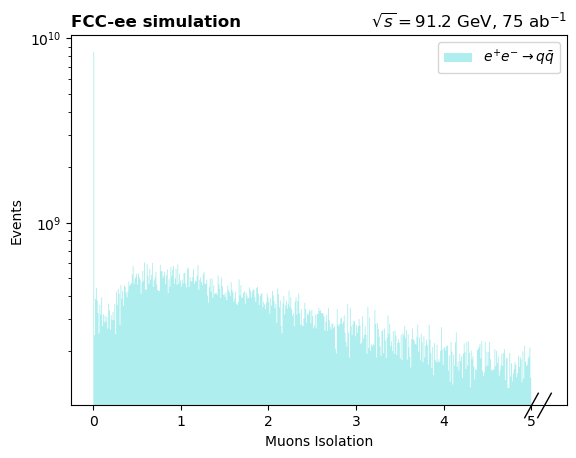

In [5]:
hep.histplot([muons_iso], label = [r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
            histtype = "fill", color = ["paleturquoise"])

plt.yscale("log")
plt.xlabel("Muons Isolation")
plt.legend(loc = "upper right")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_qq_muons_iso.png")

Text(0.0, 1.0, 'FCC-ee simulation')

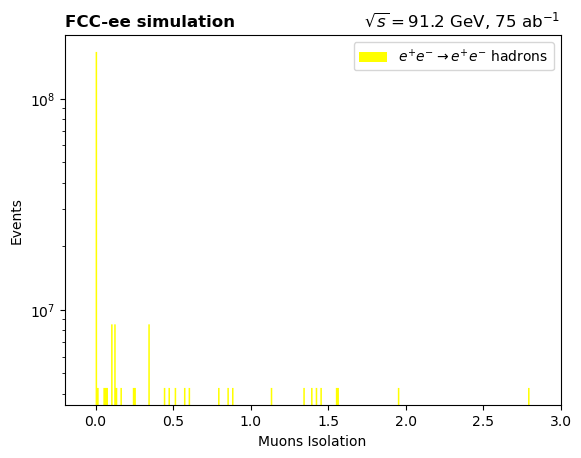

In [6]:
hep.histplot([gaga_muons_iso], label = [r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$ hadrons"], 
            histtype = "fill", color = ["yellow"])

plt.xlim(-0.2,3)
plt.yscale("log")
plt.xlabel("Muons Isolation")
plt.legend(loc = "upper right")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_gaga_muons_iso.png")

Text(0.0, 1.0, 'FCC-ee simulation')

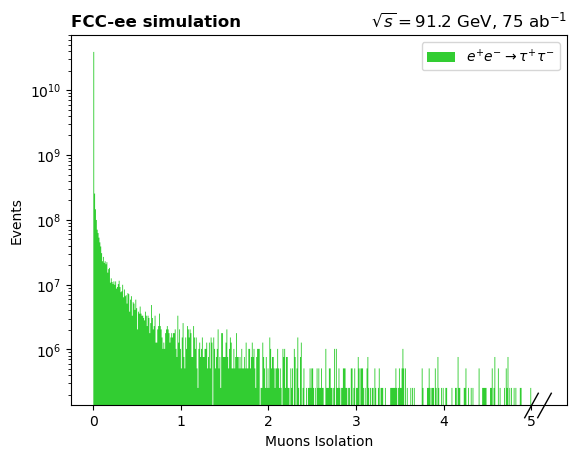

In [7]:
hep.histplot([tau_muons_iso], label = [r"$e^{+} e^{-} \rightarrow \tau^{+} \tau^{-}$"], 
            histtype = "fill", color = ["limegreen"])

plt.yscale("log")
plt.xlabel("Muons Isolation")
plt.legend(loc = "upper right")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_tau_muons_iso.png")

Text(0.0, 1.0, 'FCC-ee simulation')

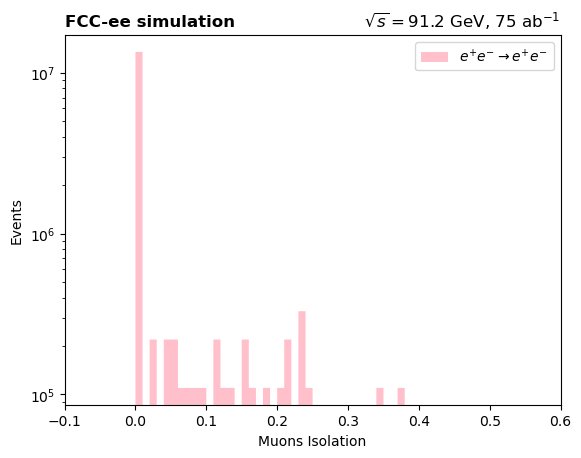

In [8]:
hep.histplot([e_muons_iso], label = [r"$e^{+} e^{-} \rightarrow e^{+} e^{-}$"], 
            histtype = "fill", color = ["pink"])

plt.xlim(-0.1,0.6)
plt.yscale("log")
plt.xlabel("Muons Isolation")
plt.legend(loc = "upper right")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_e_muons_iso.png")

Text(0.0, 1.0, 'FCC-ee simulation')

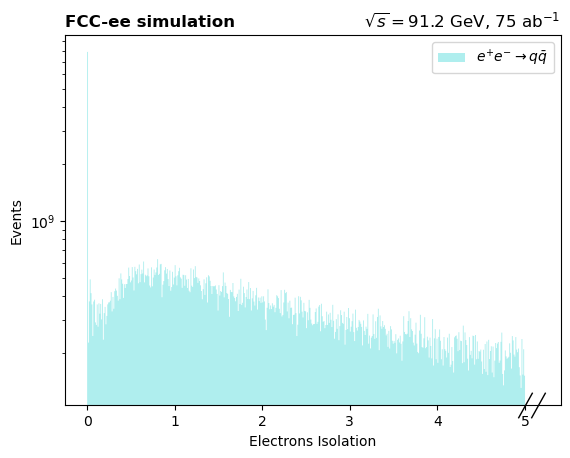

In [9]:
hep.histplot([electrons_iso], label = [r"$e^{+} e^{-} \rightarrow q \bar{q}$"], 
            histtype = "fill", color = ["paleturquoise"])

plt.yscale("log")
plt.xlabel("Electrons Isolation")
plt.legend(loc = "upper right")
plt.ylabel("Events")
plt.title(r"$\sqrt{s} = 91.2 $ GeV, 75 ab$^{-1}$", loc = "right")
plt.title("FCC-ee simulation", loc = "left", weight = "bold")
#plt.savefig("images/kkmc_qq_electrons_iso.png")

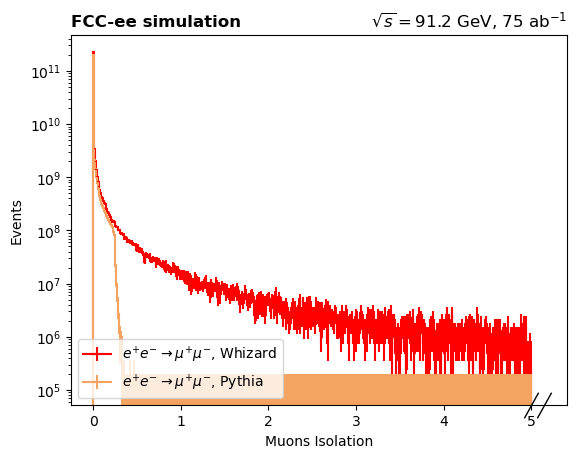

In [12]:
plot(2,["mu","p8_mu"],"muons_iso","wzp_p8_mu_muons_iso","Muons Isolation",fill_yn = "step", stack_yn = False, legend_loc = "lower left", save = True)



/work/submit/marinamn/miniforge3/envs/fccenv/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


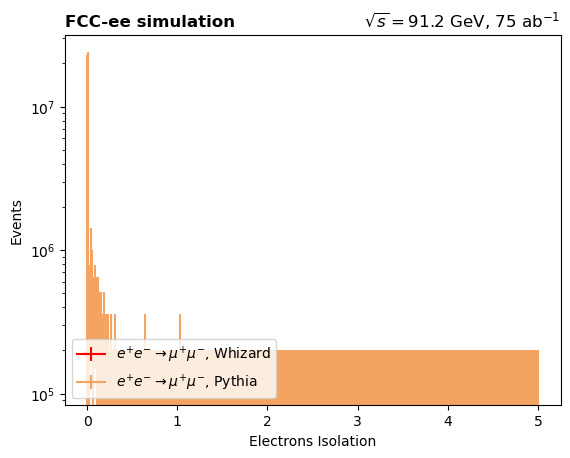

In [14]:
plot(2,["mu","p8_mu"],"electrons_iso","wzp_p8_mu_electrons_iso","Electrons Isolation",fill_yn = "step", stack_yn = False, legend_loc = "lower left", save = True)



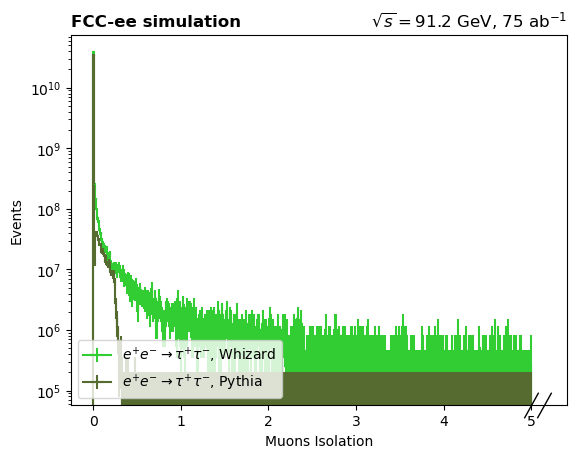

In [15]:
plot(2,["tau","p8_tau"],"muons_iso","wzp_p8_tau_muons_iso","Muons Isolation",fill_yn = "step", stack_yn = False, legend_loc = "lower left", save = True)



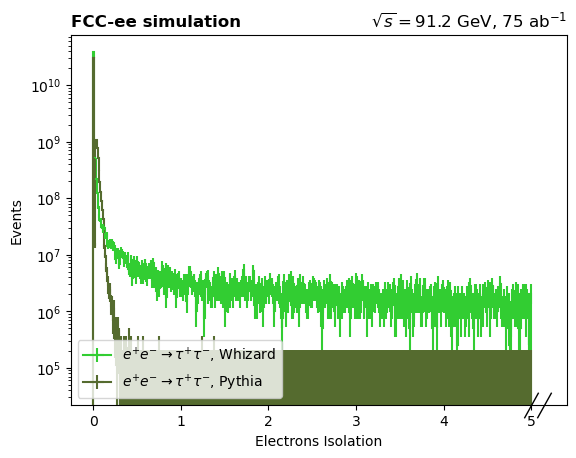

In [16]:
plot(2,["tau","p8_tau"],"electrons_iso","wzp_p8_tau_electrons_iso","Electrons Isolation",fill_yn = "step", stack_yn = False, legend_loc = "lower left", save = True)

